Importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

Read the dataset

In [11]:
df=pd.read_csv('autos.csv',encoding='ISO-8859-1')

In [12]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14 00:00:00,0.0,90480.0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21


In [13]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
74051,2016-03-26 09:56:18,Audi_A4_2_8_liter,privat,Angebot,1800,control,limousine,1995.0,automatik,174.0,a4,150000.0,8.0,benzin,audi,nein,2016-03-26 00:00:00,0.0,87477.0,2016-04-03 19:48:01
74052,2016-03-28 12:50:45,997_Carrera_4S_Cabriolet_mit_PASM__Chrono__Nav...,privat,Angebot,47300,test,cabrio,2008.0,manuell,355.0,911,70000.0,6.0,benzin,porsche,nein,2016-03-28 00:00:00,0.0,45711.0,2016-03-28 12:50:45
74053,2016-04-05 11:43:10,Renault_Kangoo_1.2_16V_Privilege,privat,Angebot,3890,test,bus,2006.0,manuell,75.0,kangoo,125000.0,3.0,benzin,renault,nein,2016-04-05 00:00:00,0.0,45143.0,2016-04-05 11:43:10
74054,2016-03-08 17:06:23,Audi_A6_Kombi,privat,Angebot,1550,control,kombi,1999.0,manuell,180.0,NaN,150000.0,9.0,diesel,audi,nein,2016-03-08 00:00:00,0.0,56579.0,2016-03-10 11:29:12
74055,2016-03-28 20:41:49,BMW_525i,privat,Angebot,3190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.shape

(74056, 20)

Cleaning the dataset

In [15]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [16]:
# Droping the Unwanted Columns
df.drop(columns= ['seller', 'offerType', 'nrOfPictures'], inplace = True)

In [17]:
df.drop(columns= ['dateCrawled', 'dateCreated','name', 'lastSeen'], inplace = True)

Handle the Missing Values

In [18]:
#check missing values
df.isnull().sum()

price                      0
abtest                     1
vehicleType             7545
yearOfRegistration         1
gearbox                 4047
powerPS                    1
model                   4093
kilometer                  1
monthOfRegistration        1
fuelType                6733
brand                      1
notRepairedDamage      14380
postalCode                 1
dtype: int64

In [19]:
#replacing the missing values
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace = True)
df['gearbox'].fillna(df['gearbox'].mode()[0], inplace = True)
df['model'].fillna(df['model'].mode()[0], inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)
df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0], inplace = True)

In [20]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480,test,limousine,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,nein,70435.0
1,18300,test,coupe,2011.0,manuell,190.0,golf,125000.0,5.0,diesel,audi,ja,66954.0
2,9800,test,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,nein,90480.0
3,1500,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,91074.0
4,3600,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,60437.0


In [21]:
df.tail()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
74051,1800,control,limousine,1995.0,automatik,174.0,a4,150000.0,8.0,benzin,audi,nein,87477.0
74052,47300,test,cabrio,2008.0,manuell,355.0,911,70000.0,6.0,benzin,porsche,nein,45711.0
74053,3890,test,bus,2006.0,manuell,75.0,kangoo,125000.0,3.0,benzin,renault,nein,45143.0
74054,1550,control,kombi,1999.0,manuell,180.0,golf,150000.0,9.0,diesel,audi,nein,56579.0
74055,3190,NaN,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,NaN,nein,NaN


In [22]:
df.isnull().sum()

price                  0
abtest                 1
vehicleType            0
yearOfRegistration     1
gearbox                0
powerPS                1
model                  0
kilometer              1
monthOfRegistration    1
fuelType               0
brand                  1
notRepairedDamage      0
postalCode             1
dtype: int64

Remove the duplicates values

In [23]:
# Checking for Duplicates
df.duplicated().sum()

782

In [24]:
# Removing Duplicates
df = df.drop_duplicates()

In [25]:
df.duplicated().sum()

0

label Encoding

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73274 entries, 0 to 74055
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                73274 non-null  int64  
 1   abtest               73273 non-null  object 
 2   vehicleType          73274 non-null  object 
 3   yearOfRegistration   73273 non-null  float64
 4   gearbox              73274 non-null  object 
 5   powerPS              73273 non-null  float64
 6   model                73274 non-null  object 
 7   kilometer            73273 non-null  float64
 8   monthOfRegistration  73273 non-null  float64
 9   fuelType             73274 non-null  object 
 10  brand                73273 non-null  object 
 11  notRepairedDamage    73274 non-null  object 
 12  postalCode           73273 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 7.8+ MB


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['model'] = le.fit_transform(df['model'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73274 entries, 0 to 74055
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                73274 non-null  int64  
 1   abtest               73274 non-null  int64  
 2   vehicleType          73274 non-null  int64  
 3   yearOfRegistration   73273 non-null  float64
 4   gearbox              73274 non-null  int64  
 5   powerPS              73273 non-null  float64
 6   model                73274 non-null  int64  
 7   kilometer            73273 non-null  float64
 8   monthOfRegistration  73273 non-null  float64
 9   fuelType             73274 non-null  int64  
 10  brand                73274 non-null  int64  
 11  notRepairedDamage    73274 non-null  int64  
 12  postalCode           73273 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 7.8 MB


In [30]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480,1,6,1993.0,1,0.0,117,150000.0,0.0,1,38,0,70435.0
1,18300,1,3,2011.0,1,190.0,117,125000.0,5.0,3,1,1,66954.0
2,9800,1,7,2004.0,0,163.0,118,125000.0,8.0,3,14,0,90480.0
3,1500,1,4,2001.0,1,75.0,117,150000.0,6.0,1,38,0,91074.0
4,3600,1,4,2008.0,1,69.0,102,90000.0,7.0,3,31,0,60437.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72f9718b50>,
      dtype=object)

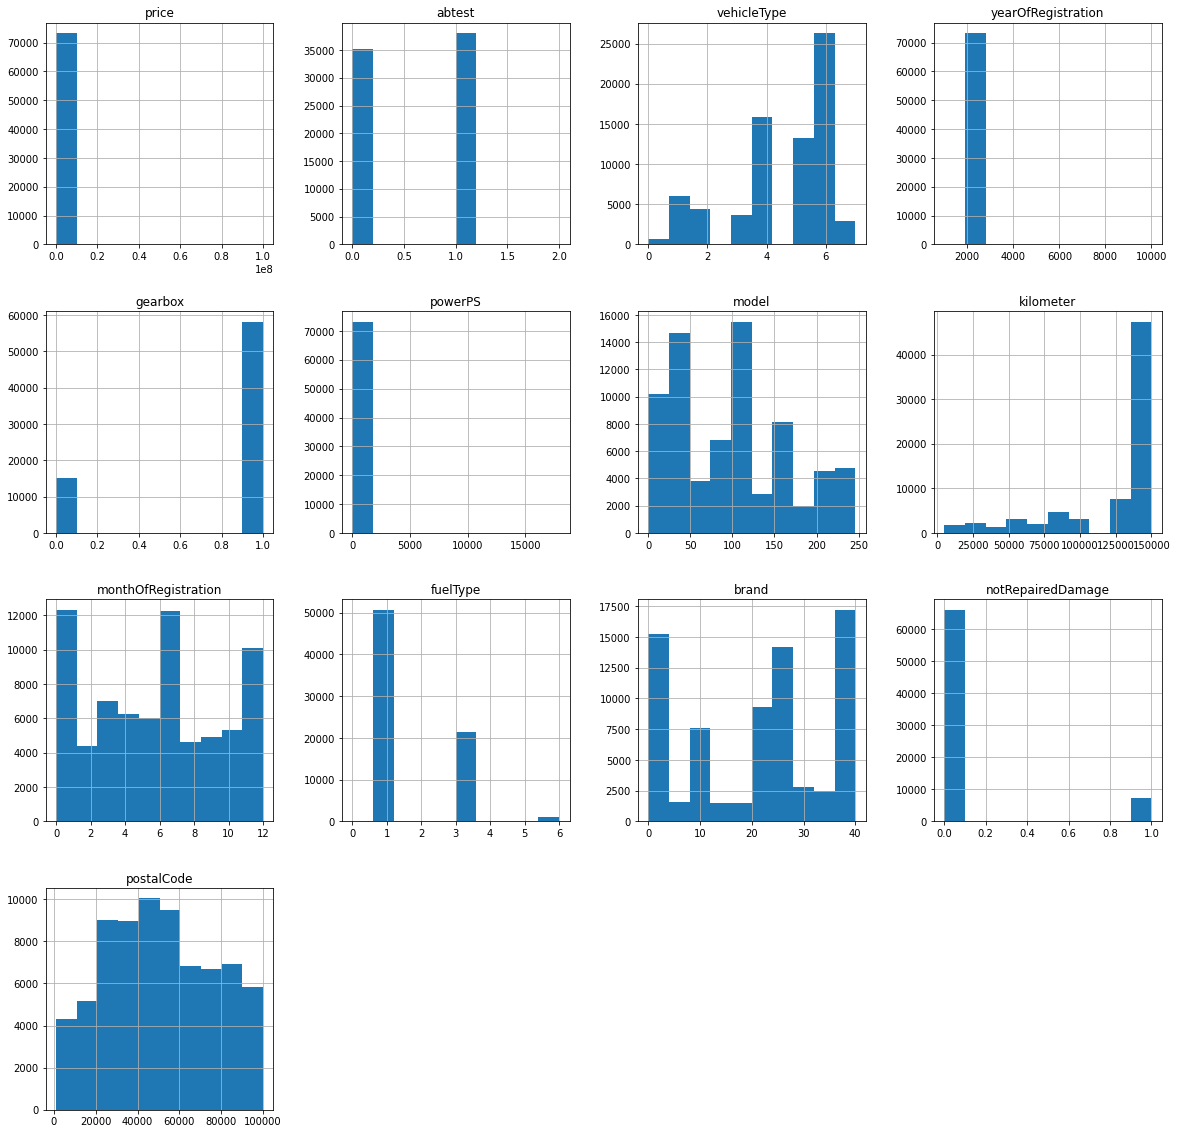

In [31]:
df.hist(figsize=(20,20))

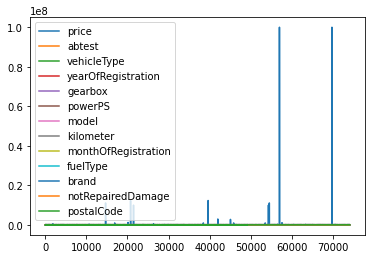

In [32]:
df.plot()

Replacing The Outliers

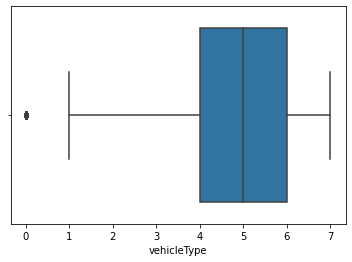

In [33]:
sns.boxplot(x = df['vehicleType'])

In [34]:
q1=df["vehicleType"].quantile(0.25)  
q3=df["vehicleType"].quantile(0.75)
q1

4.0

In [35]:
q3

6.0

In [36]:
IQR=q3-q1

In [37]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [38]:
upper_limit

9.0

In [39]:
lower_limit

1.0

In [40]:
df.median()

price                    2950.0
abtest                      1.0
vehicleType                 5.0
yearOfRegistration       2003.0
gearbox                     1.0
powerPS                   105.0
model                     103.0
kilometer              150000.0
monthOfRegistration         6.0
fuelType                    1.0
brand                      23.0
notRepairedDamage           0.0
postalCode              49635.0
dtype: float64

In [41]:
df["vehicleType"]= np.where(df["vehicleType"]<lower_limit,5.0,df["vehicleType"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


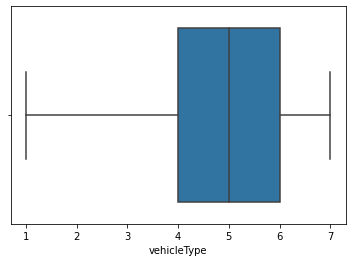

In [42]:
sns.boxplot(df["vehicleType"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


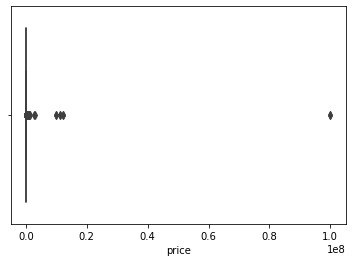

In [43]:
sns.boxplot(df['price'])

In [44]:
q1=df["price"].quantile(0.25)  
q3=df["price"].quantile(0.75)
q1

1150.0

In [45]:
q3

7200.0

In [46]:
IQR=q3-q1

In [47]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [48]:
upper_limit

16275.0

In [49]:
lower_limit

-7925.0

In [50]:
df["price"]= np.where(df["price"]>upper_limit,16150.0,df["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


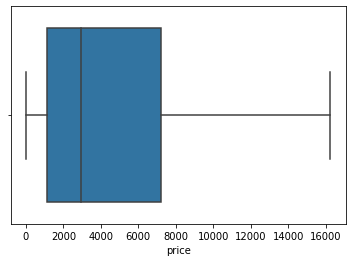

In [51]:
sns.boxplot(df['price'])


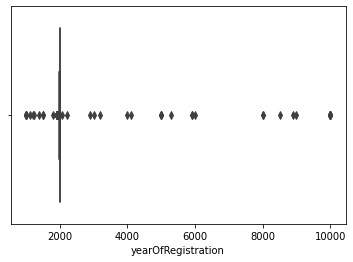

In [52]:
sns.boxplot(x = df['yearOfRegistration'])

In [53]:
q1=df["yearOfRegistration"].quantile(0.25)  
q3=df["yearOfRegistration"].quantile(0.75)
q1

1999.0

In [54]:
q3

2008.0

In [55]:
IQR=q3-q1

In [56]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [57]:
upper_limit

2021.5

In [58]:
lower_limit

1985.5

In [59]:
df["yearOfRegistration"]= np.where(df["yearOfRegistration"]<lower_limit,2003.0,df["yearOfRegistration"])

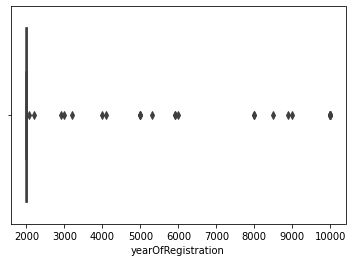

In [60]:
sns.boxplot(x = df['yearOfRegistration'])

In [61]:
df["yearOfRegistration"]= np.where(df["yearOfRegistration"]>upper_limit,2003.0,df["yearOfRegistration"])

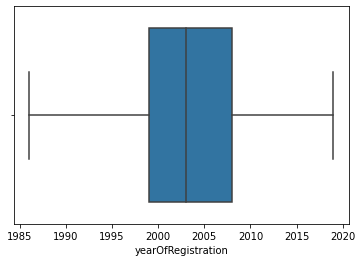

In [62]:
sns.boxplot(x = df['yearOfRegistration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


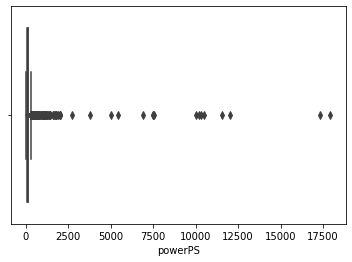

In [63]:
sns.boxplot(df['powerPS'])

In [64]:
q1=df["powerPS"].quantile(0.25)  
q3=df["powerPS"].quantile(0.75)
q1

69.0

In [65]:
q3

150.0

In [66]:
IQR=q3-q1

In [67]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [68]:
upper_limit

271.5

In [69]:
lower_limit

-52.5

In [70]:
df["powerPS"]= np.where(df["powerPS"]>upper_limit,270.0,df["powerPS"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


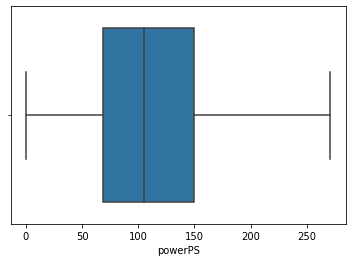

In [71]:
sns.boxplot(df['powerPS'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


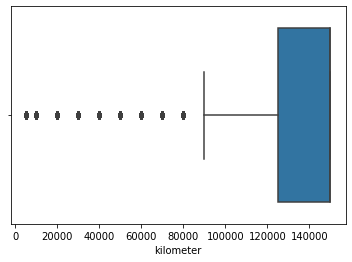

In [72]:
sns.boxplot(df['kilometer'])

In [73]:
q1=df["kilometer"].quantile(0.25)  
q3=df["kilometer"].quantile(0.75)
q1

125000.0

In [74]:
q3

150000.0

In [75]:
IQR=q3-q1

In [76]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [77]:
upper_limit

187500.0

In [78]:
lower_limit

87500.0

In [79]:
df["kilometer"]= np.where(df["kilometer"]<lower_limit,87500.0,df["kilometer"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


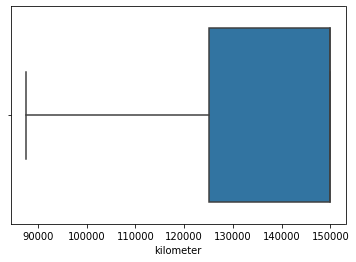

In [80]:
sns.boxplot(df['kilometer'])

In [81]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480.0,1,6.0,1993.0,1,0.0,117,150000.0,0.0,1,38,0,70435.0
1,16150.0,1,3.0,2011.0,1,190.0,117,125000.0,5.0,3,1,1,66954.0
2,9800.0,1,7.0,2004.0,0,163.0,118,125000.0,8.0,3,14,0,90480.0
3,1500.0,1,4.0,2001.0,1,75.0,117,150000.0,6.0,1,38,0,91074.0
4,3600.0,1,4.0,2008.0,1,69.0,102,90000.0,7.0,3,31,0,60437.0


Split the Data into Dependent and Independent variables.

In [82]:
x=df.drop(columns=['price'],axis=1)
x

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,1,6.0,1993.0,1,0.0,117,150000.0,0.0,1,38,0,70435.0
1,1,3.0,2011.0,1,190.0,117,125000.0,5.0,3,1,1,66954.0
2,1,7.0,2004.0,0,163.0,118,125000.0,8.0,3,14,0,90480.0
3,1,4.0,2001.0,1,75.0,117,150000.0,6.0,1,38,0,91074.0
4,1,4.0,2008.0,1,69.0,102,90000.0,7.0,3,31,0,60437.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74051,0,6.0,1995.0,0,174.0,29,150000.0,8.0,1,1,0,87477.0
74052,1,2.0,2008.0,1,270.0,25,87500.0,6.0,1,26,0,45711.0
74053,1,1.0,2006.0,1,75.0,134,125000.0,3.0,1,27,0,45143.0
74054,0,5.0,1999.0,1,180.0,117,150000.0,9.0,3,1,0,56579.0


In [83]:
y = df['price']
y

0          480.0
1        16150.0
2         9800.0
3         1500.0
4         3600.0
          ...   
74051     1800.0
74052    16150.0
74053     3890.0
74054     1550.0
74055     3190.0
Name: price, Length: 73274, dtype: float64

Scaling the independent variable

In [84]:
dfN=pd.DataFrame(scale(x),columns=x.columns)
dfN.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,0.962885,0.853058,-1.699608,0.508733,-1.705491,0.237773,0.683997,-1.543070,-0.626996,1.300100,-0.331602,0.755557
1,0.962885,-0.990189,1.110799,0.508733,1.240775,0.237773,-0.288038,-0.197454,1.276016,-1.476132,3.015664,0.620867
2,0.962885,1.467473,0.017863,-1.965670,0.822096,0.252334,-0.288038,0.609915,1.276016,-0.500699,-0.331602,1.531155
3,0.962885,-0.375773,-0.450538,0.508733,-0.542491,0.237773,0.683997,0.071669,-0.626996,1.300100,-0.331602,1.554138
4,0.962885,-0.375773,0.642398,0.508733,-0.635531,0.019357,-1.648886,0.340792,1.276016,0.774867,-0.331602,0.368706


In [85]:
dfN.shape

(73274, 12)

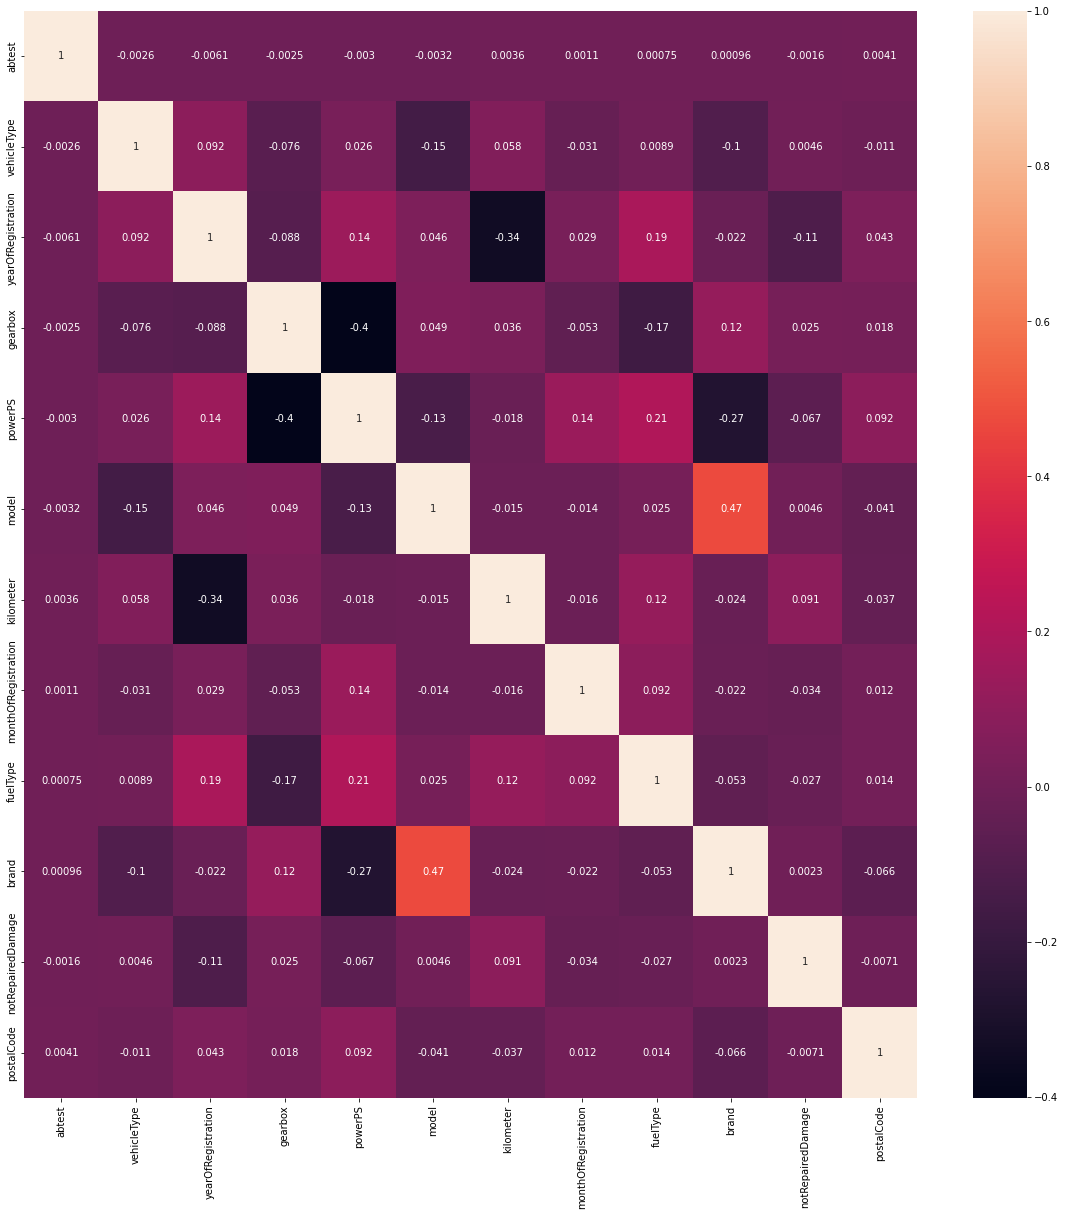

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(dfN.corr(), annot = True)
plt.show()

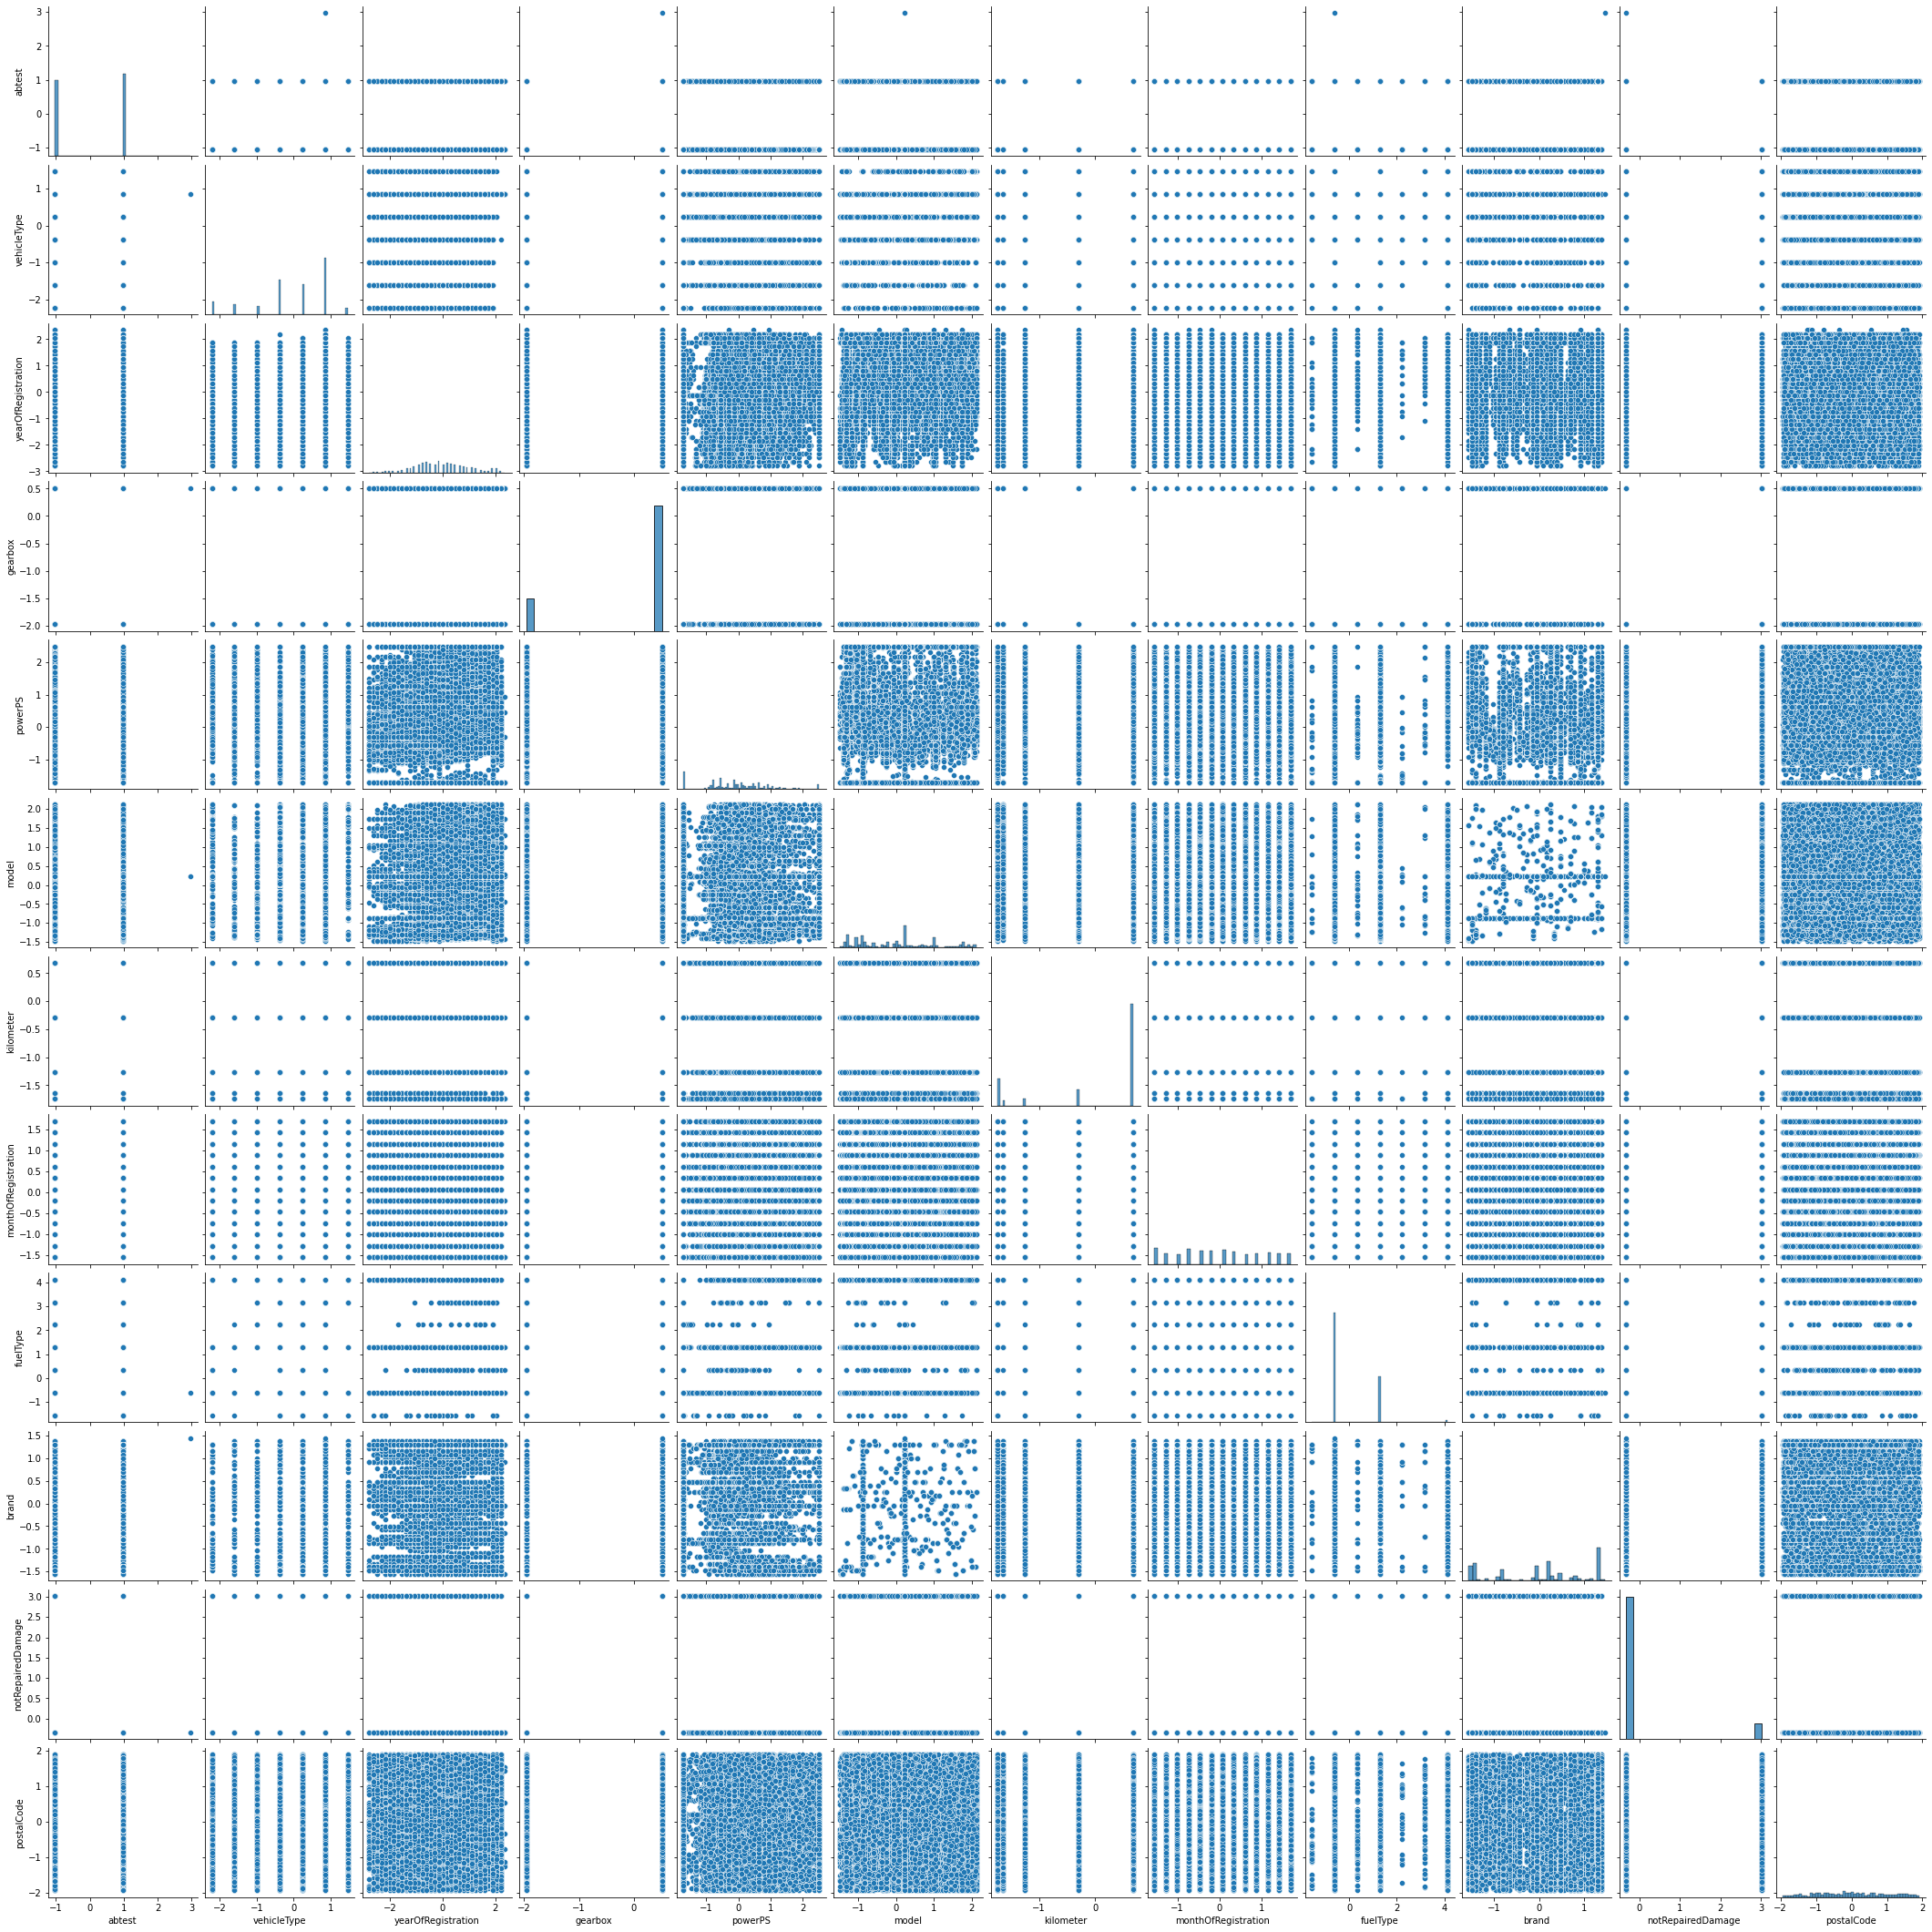

In [87]:
sns.pairplot(dfN)
plt.show()

Descriptive statistics

In [88]:
dfN.nunique()

abtest                    3
vehicleType               7
yearOfRegistration       34
gearbox                   2
powerPS                 263
model                   247
kilometer                 5
monthOfRegistration      13
fuelType                  7
brand                    41
notRepairedDamage         2
postalCode             7450
dtype: int64

In [89]:
dfN.describe()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
count,7.327400e+04,7.327400e+04,7.327300e+04,7.327400e+04,7.327300e+04,7.327400e+04,7.327300e+04,7.327300e+04,7.327400e+04,7.327400e+04,7.327400e+04,7.327300e+04
mean,7.224313e-17,-2.435903e-16,-2.606607e-16,5.905513e-17,4.480105e-17,-2.787906e-17,3.177772e-16,6.555305e-17,5.973392e-17,8.378264e-17,-1.590319e-17,-5.624374e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.038432e+00,-2.219020e+00,-2.792544e+00,-1.965670e+00,-1.705491e+00,-1.465872e+00,-1.746090e+00,-1.543070e+00,-1.578502e+00,-1.551165e+00,-3.316020e-01,-1.928489e+00
25%,-1.038432e+00,-3.757734e-01,-7.628057e-01,5.087325e-01,-6.355309e-01,-8.834293e-01,-2.880378e-01,-7.357006e-01,-6.269963e-01,-8.758652e-01,-3.316020e-01,-7.889070e-01
50%,9.628850e-01,2.386422e-01,-1.382708e-01,5.087325e-01,-7.729101e-02,3.391786e-02,6.839967e-01,7.166898e-02,-6.269963e-01,1.746008e-01,-3.316020e-01,-4.925459e-02
75%,9.628850e-01,8.530577e-01,6.423978e-01,5.087325e-01,6.205089e-01,7.328491e-01,6.839967e-01,8.790386e-01,1.276016e+00,9.249337e-01,-3.316020e-01,8.188194e-01
max,2.964202e+00,1.467473e+00,2.359869e+00,5.087325e-01,2.496815e+00,2.116150e+00,6.839967e-01,1.686408e+00,4.130535e+00,1.450167e+00,3.015664e+00,1.899356e+00


In [90]:
dfN.skew()

abtest                -0.075225
vehicleType           -0.855490
yearOfRegistration     0.142682
gearbox               -1.456967
powerPS                0.309977
model                  0.396268
kilometer             -0.956763
monthOfRegistration    0.080527
fuelType               1.464127
brand                 -0.151835
notRepairedDamage      2.684117
postalCode             0.061864
dtype: float64

In [91]:
dfN.kurt()

abtest                -1.993520
vehicleType           -0.176573
yearOfRegistration    -0.314469
gearbox                0.122756
powerPS               -0.003322
model                 -0.913527
kilometer             -0.886013
monthOfRegistration   -1.141973
fuelType               2.110359
brand                 -1.320392
notRepairedDamage      5.204625
postalCode            -0.983328
dtype: float64

Split the data into training and testing

In [92]:
# Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfN, y, test_size=0.2, random_state=0)